# Made by Antonio Caradonna

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import os


import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

#### First, we create our DataFrame from the corresponding table

In [66]:
df = pd.read_csv('TACoS_ACoS.csv', index_col=False)
df.head()

,Date,TACOS,ACOS
0,2023-01-01,7.9%,13.7%
1,2023-01-02,7.6%,13.6%
2,2023-01-03,7.3%,14.0%
3,2023-01-04,7.6%,13.9%
4,2023-01-05,7.1%,14.5%


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    88 non-null     object
 1   TACOS   88 non-null     object
 2   ACOS    88 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


#### We need to fix the type of the data before beginning the analysis

In [68]:
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    88 non-null     datetime64[ns]
 1   TACOS   88 non-null     object        
 2   ACOS    88 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.2+ KB


#### Next, the first thing I notice is the Date is not in a convenient format. We are going to add some columns to help us analyze the data in time.

In [69]:
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df.head()

,Date,TACOS,ACOS,Day,Week,Month
0,2023-01-01,7.9%,13.7%,1,52,1
1,2023-01-02,7.6%,13.6%,2,1,1
2,2023-01-03,7.3%,14.0%,3,1,1
3,2023-01-04,7.6%,13.9%,4,1,1
4,2023-01-05,7.1%,14.5%,5,1,1


#### Also, let's change the data type for TACoS and ACoS to float.

In [70]:
df['TACOS'] = df['TACOS'].str.replace('%', '').astype(float) / 100
df['ACOS'] = df['ACOS'].str.replace('%', '').astype(float) / 100
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    88 non-null     datetime64[ns]
 1   TACOS   88 non-null     float64       
 2   ACOS    88 non-null     float64       
 3   Day     88 non-null     int64         
 4   Week    88 non-null     UInt32        
 5   Month   88 non-null     int64         
dtypes: UInt32(1), datetime64[ns](1), float64(2), int64(2)
memory usage: 4.0 KB


In [71]:
df.describe()

,TACOS,ACOS,Day,Week,Month
count,88.000000,88.000000,88.000000,88.0,88.000000
mean,0.070409,0.149420,15.193182,7.238636,1.977273
std,0.017577,0.024981,8.557927,6.017206,0.830140
min,0.022000,0.103000,1.000000,1.0,1.000000
25%,0.061750,0.134000,8.000000,4.0,1.000000
50%,0.072500,0.145000,15.000000,7.0,2.000000
75%,0.079000,0.157000,22.250000,10.0,3.000000
max,0.132000,0.229000,31.000000,52.0,3.000000


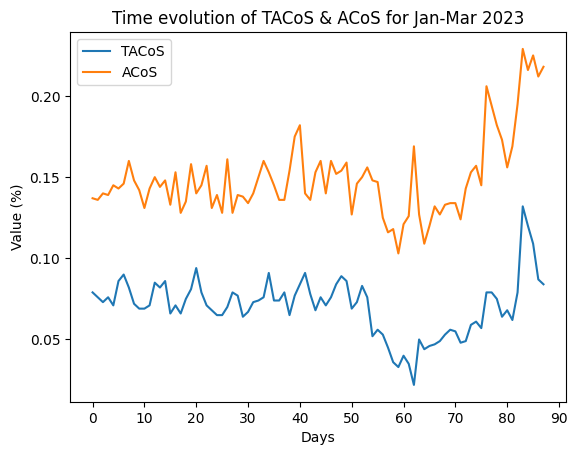

In [94]:
df['day_for_plot'] = range(0,88,1)

plt.plot(df['day_for_plot'], df['TACOS'], label='TACoS')
plt.plot(df['day_for_plot'], df['ACOS'], label='ACoS')
plt.title('Time evolution of TACoS & ACoS for Jan-Mar 2023')
plt.xticks(range(0,100,10))
plt.xlabel('Days')
plt.ylabel('Value (%)')
plt.legend()
plt.show()

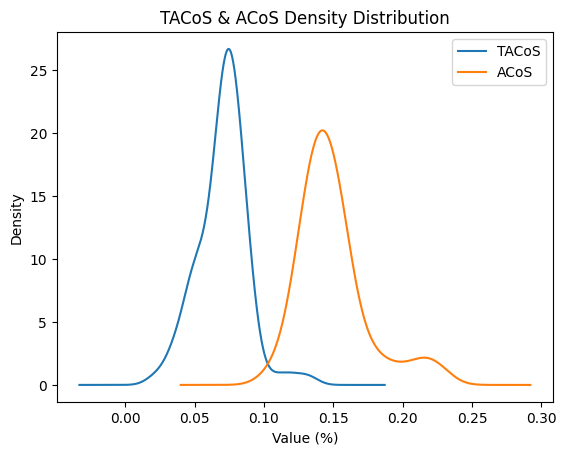

In [85]:
df['TACOS'].plot(kind="kde",label='TACoS')
df['ACOS'].plot(kind="kde",label='ACoS')
plt.title('TACoS & ACoS Density Distribution')
plt.xlabel('Value (%)')
plt.legend()
plt.show()

#### We use the Pearson correlation because from the density distribution we can see that both columns are normally distributed.

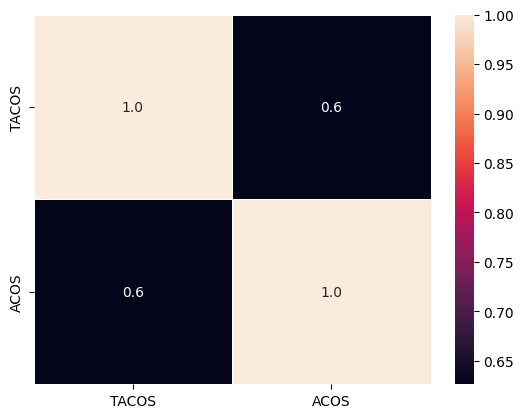

In [63]:
#plt.subplots(figsize=(18,18))
sns.heatmap(df[['TACOS','ACOS']].corr(method='pearson'), annot=True, linewidths =.5, fmt ='.1f')
plt.show()

In [92]:
r = scipy.stats.pearsonr(df['TACOS'], df['ACOS'])    # Pearson's r
print(r)


PearsonRResult(statistic=0.6263039834808486, pvalue=6.74945221652016e-11)


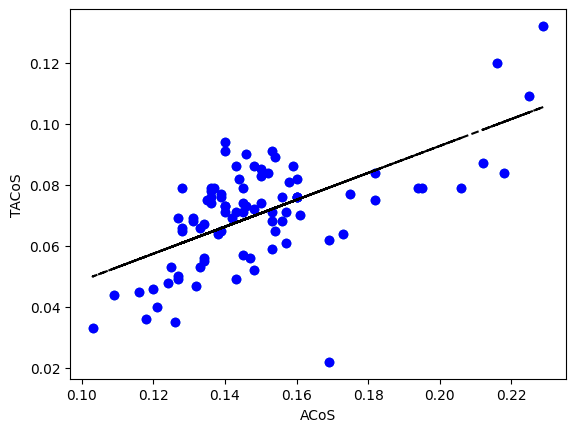

In [41]:
fig, ax = plt.subplots()
ax.scatter(df['ACOS'], df['TACOS'])
ax.set_xlabel('ACoS')
ax.set_ylabel('TACoS')

lr = np.polyfit(df['ACOS'],df['TACOS'],1)
poly1d_fn = np.poly1d(lr) 
plt.plot(df['ACOS'],df['TACOS'], 'bo',df['ACOS'] , poly1d_fn(df['ACOS']), '--k')

plt.show()

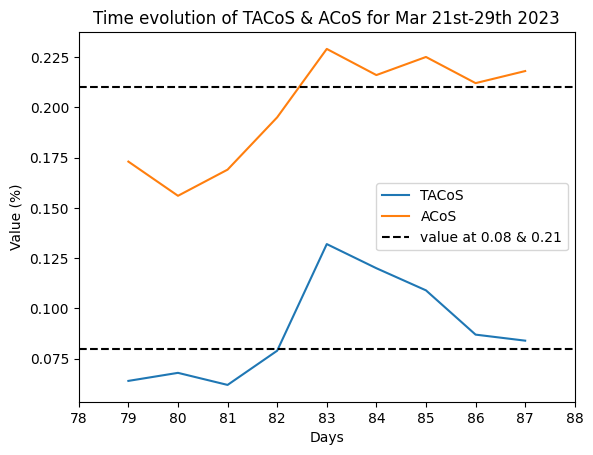

In [130]:
# Plotting the last days for the time series

new_df = df.iloc[-9:]

plt.plot(new_df['day_for_plot'], new_df['TACOS'], label='TACoS')
plt.plot(new_df['day_for_plot'], new_df['ACOS'], label='ACoS')
plt.axhline(y=0.08, color='black', linestyle='--', label = 'value at 0.08 & 0.21')
plt.axhline(y=0.21, color='black', linestyle='--')
plt.title('Time evolution of TACoS & ACoS for Mar 21st-29th 2023')
plt.xticks(range(78,89,1))
plt.xlabel('Days')
plt.ylabel('Value (%)')
plt.legend()
plt.show()

# Results

From the time evolution, we see that both TACoS and ACoS have a very similar behavior and the same tendency. In fact, from the pearson correlation and the scatter plot we can observe that they are highly correlated.

The above data could indicate that the brand or product are new and the company is starting to push its ad campaign. That is why TACoS is also increasing, due to the fact that the ad costs are increasing, but there are no significant organic sales yet. Another posibility is that, amazon e-commerce is heavily based on seasonality and we are only looking at data for the winter season. If the product is, for example, sunglasses, there is no need to push the campaign during winter, that would explain why it is growing as we approach spring season.

To confidently answer what ACoS can we afford with a target TACoS of 8%, it would be important to have more data to observe the development of the campaign for the product. However, based on the behavior of the data provided we can see that pushing ACoS to 25% increased TACoS to $\sim$ 12%, while decreasing ACoS to $\sim$ 21% made our TACoS return to $\sim$ 8%. That being said, based on the data, we should keep the ACoS around 20% - 22% to target a TACoS of 8%. 